# Perbandingan SARIMA dan autoARIMA pada Forecast Closing Price Saham Telkom

# Andara Najla Jilan (10060220025) - EWAKO

In [1]:
#import library yang diperlukan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
import numpy as np
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
#import dataset
df = pd.read_csv("TLKM.JK.csv")

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
#missing value check
df.isna().sum()

In [ ]:
#cek duplikasi data
df.duplicated().sum()

In [ ]:
#missing value treatment
df.dropna(inplace=True)

In [ ]:
#hasil treatment missing value
df.isna().sum()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
#date sebagai index
df = df.set_index("Date")

In [ ]:
df

# Data Visualization 

In [ ]:
fig = make_subplots(rows=6, cols=1, 
                    subplot_titles=("Opening Price", "Closing Price", "Highest Price", 
                                    "Lowest Price", "Adjusted Closing Price", "Volume"))

fig.add_trace(go.Scatter(x=df.index, y=df["Open"]), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["Close"]), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["High"]), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["Low"]), row=4, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["Adj Close"]), row=5, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["Volume"]), row=6, col=1)
fig.update_layout(showlegend=False, height=1200, width=800)
fig.show()

Data dipisah berdasarkan "Opening Price", "Closing Price", "Highest Price", "Lowest Price", "Adjusted Closing Price", dan "Volume"

In [ ]:
fig = go.Figure(data=go.Ohlc(x=df.index, open=df["Open"], high=df["High"], low=df["Low"], close=df["Close"]))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(title_text="OHLC Chart", title_x=0.5)
fig.show()

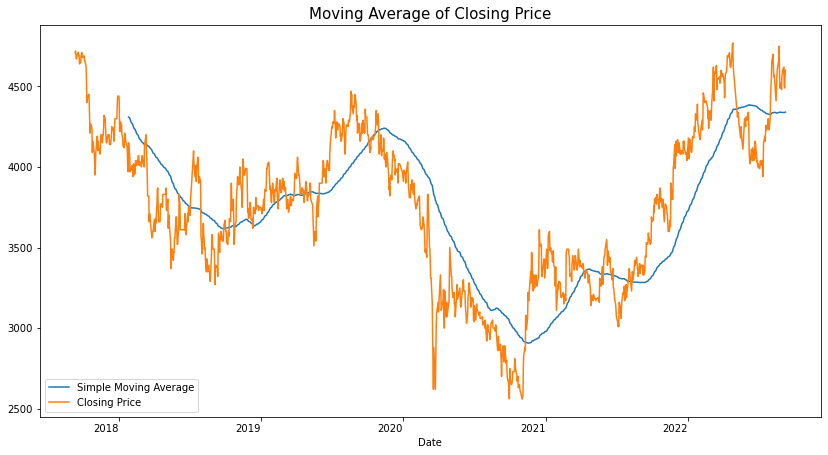

In [18]:
simple_ma = df["Close"].rolling(window=100).mean()

plt.figure(figsize=(14,8))
simple_ma.plot(label="Simple Moving Average")
df["Close"].plot(label="Closing Price")
plt.xticks(rotation=0)
plt.title("Moving Average of Closing Price", size=15)
plt.legend()
plt.show()

Sampai sini kita bisa lihat data seasonalnya bersifat monthly(bulanan)

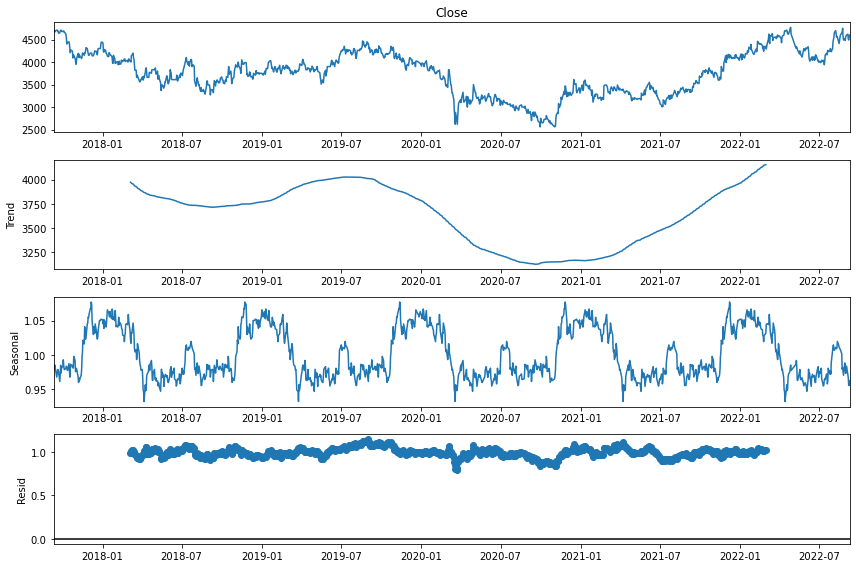

In [19]:
#seasonal decomposition

results = seasonal_decompose(df["Close"], model="multiplicative", period=252)
fig = results.plot()
fig.set_size_inches(12, 8)
fig.tight_layout()
plt.show()

In [20]:
#data split
df = df.resample("MS").sum()

In [21]:
df 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-01,70230.0,70690.0,69990.0,70350.0,60109.231201,1.094631e+09
2017-10-01,96920.0,97710.0,95430.0,96420.0,82384.250977,3.756859e+09
2017-11-01,91480.0,92450.0,90790.0,91550.0,78223.169925,2.341006e+09
2017-12-01,88520.0,89210.0,88130.0,88950.0,76001.649660,1.292206e+09
2018-01-01,96160.0,96890.0,94950.0,95740.0,81803.234620,2.519969e+09
...,...,...,...,...,...,...
2022-05-01,63900.0,64760.0,62900.0,63670.0,61423.340333,3.093160e+09
2022-06-01,86500.0,87400.0,85450.0,86420.0,85813.434082,2.461542e+09
2022-07-01,86520.0,87260.0,85350.0,86540.0,86540.000000,1.585604e+09


In [22]:
df = df.reset_index()


In [23]:

size = int(len(df)*0.8)
train = df.loc[:size,["Date", "Close"]]
test = df.loc[size+1:, ["Date", "Close"]]

train dan test data pada closing price

In [24]:
df = df.set_index("Date")


In [25]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-01,70230.0,70690.0,69990.0,70350.0,60109.231201,1.094631e+09
2017-10-01,96920.0,97710.0,95430.0,96420.0,82384.250977,3.756859e+09
2017-11-01,91480.0,92450.0,90790.0,91550.0,78223.169925,2.341006e+09
2017-12-01,88520.0,89210.0,88130.0,88950.0,76001.649660,1.292206e+09
2018-01-01,96160.0,96890.0,94950.0,95740.0,81803.234620,2.519969e+09
...,...,...,...,...,...,...
2022-05-01,63900.0,64760.0,62900.0,63670.0,61423.340333,3.093160e+09
2022-06-01,86500.0,87400.0,85450.0,86420.0,85813.434082,2.461542e+09
2022-07-01,86520.0,87260.0,85350.0,86540.0,86540.000000,1.585604e+09


In [26]:
print("Train size:", len(train))
print("Test size:", len(test))
print("Is sum of train and test sizes equal to whole data size:", len(train)+len(test) == df["Close"].shape[0])

Train size: 49
Test size: 12
Is sum of train and test sizes equal to whole data size: True


In [27]:
train = train.set_index("Date")
test = test.set_index("Date")

In [28]:
def adf_test(data):
    result = adfuller(data)
    print(f'ADF Test Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Number of Lags: {result[2]}')
    print(f'Number of Observations Used: {result[3]}')
    print('Critial Values:')
    for key, value in result[4].items():
        print(f'\t{key}, {value}')

In [29]:
#uji stasioneritas data
adf_test(train["Close"])

ADF Test Statistic: -1.8491197732856217
p-value: 0.3563619168321114
Number of Lags: 3
Number of Observations Used: 45
Critial Values:
	1%, -3.584828853223594
	5%, -2.9282991495198907
	10%, -2.6023438271604937


Data sudah stasioner

In [30]:
differenced_df = train["Close"] - train["Close"].shift()

In [31]:
#menghilangkan stasioneritas data
adf_test(differenced_df.dropna())

ADF Test Statistic: -4.2067747953919685
p-value: 0.0006417156095600414
Number of Lags: 2
Number of Observations Used: 45
Critial Values:
	1%, -3.584828853223594
	5%, -2.9282991495198907
	10%, -2.6023438271604937


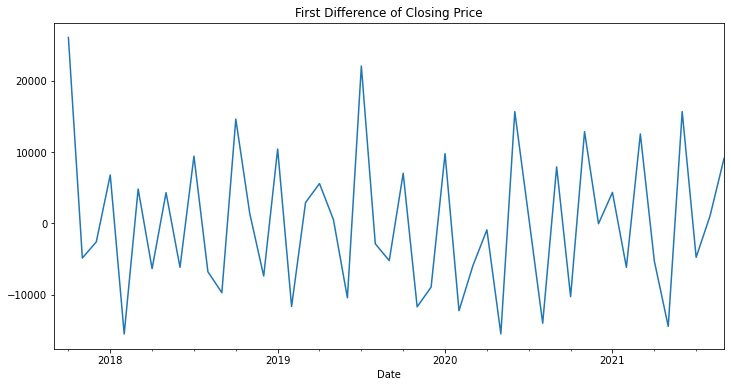

In [32]:
plt.figure(figsize=(12, 6))
differenced_df.plot()
plt.title("First Difference of Closing Price")
plt.show()

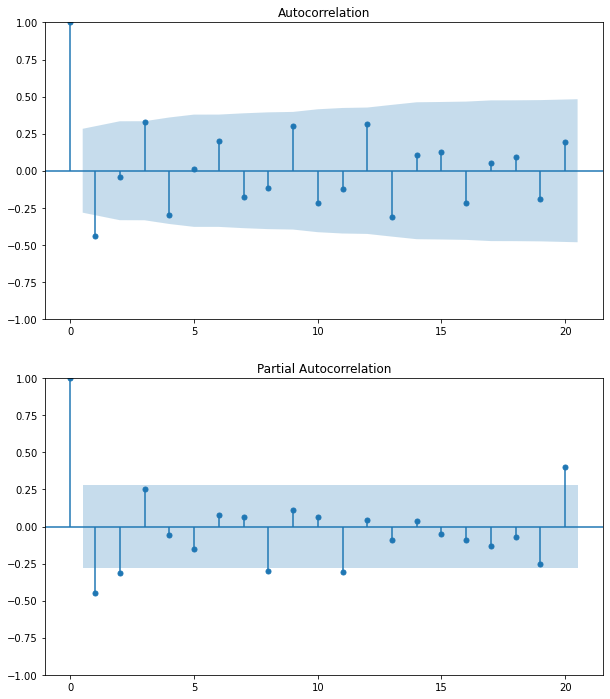

In [33]:
#menentukan value p dan q

fig, ax = plt.subplots(2 ,1, figsize=(10, 12))
plot_acf(differenced_df.iloc[1:], lags=20, ax=ax[0])
plot_pacf(differenced_df.iloc[1:], lags=20, ax=ax[1])
plt.show()

# Model Building

In [34]:
#untuk melihat prediksi dari 1 September 2022
df.drop("2022-09-01", axis=0, inplace=True)

In [35]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-01,70230.0,70690.0,69990.0,70350.0,60109.231201,1.094631e+09
2017-10-01,96920.0,97710.0,95430.0,96420.0,82384.250977,3.756859e+09
2017-11-01,91480.0,92450.0,90790.0,91550.0,78223.169925,2.341006e+09
2017-12-01,88520.0,89210.0,88130.0,88950.0,76001.649660,1.292206e+09
2018-01-01,96160.0,96890.0,94950.0,95740.0,81803.234620,2.519969e+09
2018-02-01,80270.0,80860.0,79650.0,80220.0,68542.464598,1.525613e+09
2018-03-01,85310.0,86130.0,84240.0,85030.0,72652.279050,2.369190e+09
2018-04-01,78400.0,79180.0,77970.0,78670.0,67218.095455,1.160043e+09
2018-05-01,82840.0,84280.0,81770.0,82970.0,71378.987062,2.510475e+09


In [36]:
df.index

DatetimeIndex(['2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
      

In [37]:
df = df.reset_index()

In [38]:
sarima = sm.tsa.statespace.SARIMAX(df.loc[:48, "Close"], order=(1,1,1), seasonal_order=(1,1,1,12))
results = sarima.fit()

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                   49
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -382.116
Date:                            Sun, 18 Sep 2022   AIC                            774.231
Time:                                    19:51:18   BIC                            782.149
Sample:                                         0   HQIC                           776.995
                                             - 49                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0075      1.592      0.005      0.996      -3.112       3.127
ma.L1         -0.1352      1.589     -0.085      0.932      -3.249       2.979
ar.S.L12       0.3655      0.403      0.906      0.365      -0.425       1.156
ma.S.L12      -0.8119      0.686     -1.184      0.236      -2.156       0.532
sigma2      1.168e+08   1.35e-08   8.66e+15      0.000    1.17e+08    1.17e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.81   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.18   Prob(JB):                         0.63
Heteroskedasticity (H):               2.15   Skew:                             0.35
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.62e+32. Standard errors may be unstable.
"""

# Proses Forecasting

In [40]:
df["forecast_train"] = results.predict(start=0, end=73)

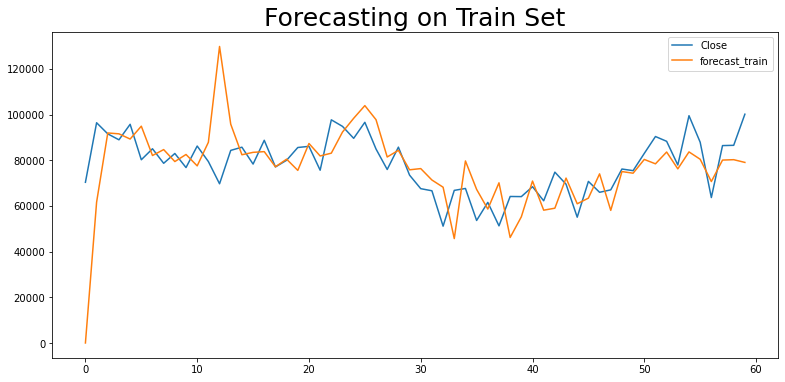

In [41]:
df[["Close", "forecast_train"]].plot(figsize=(13,6))
plt.title("Forecasting on Train Set", size=25)
plt.show()

closing price dan forecast_train memiliki nilai yang berdekatan dengan sedikit fluktuasi

In [42]:
df["forecast_test"] = results.forecast(11)

In [43]:
df["forecast_test"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
30             NaN
31             NaN
32             NaN
33             NaN
34             NaN
35             NaN
36             NaN
37             NaN
38             NaN
39             NaN
40             NaN
41             NaN
42             NaN
43             NaN
44             NaN
45             NaN
46             NaN
47             NaN
48             NaN
49    74331.076642
50    80353.895912
51    78438.094669
52    83604.

In [44]:
df.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume,forecast_train,forecast_test
40,2021-01-01,68770.0,69730.0,67500.0,68420.0,62837.268551,3.447170e+09,70895.308039,NaN
41,2021-02-01,62070.0,63280.0,61390.0,62250.0,57170.709714,2.649004e+09,58143.183533,NaN
42,2021-03-01,75070.0,75710.0,74180.0,74790.0,68687.507806,2.074015e+09,59005.886612,NaN
43,2021-04-01,69770.0,70220.0,69150.0,69520.0,63847.513912,1.463521e+09,72187.302108,NaN
44,2021-05-01,55020.0,55630.0,54400.0,55070.0,50576.562254,1.795042e+09,60945.873286,NaN
45,2021-06-01,70700.0,71670.0,69920.0,70740.0,67433.922851,1.947803e+09,63414.355253,NaN
46,2021-07-01,65990.0,66770.0,65110.0,65970.0,63642.181643,2.252936e+09,74036.561298,NaN
47,2021-08-01,66840.0,67560.0,66080.0,67040.0,64674.425782,1.543887e+09,58056.737100,NaN
48,2021-09-01,75890.0,76670.0,75150.0,76160.0,73472.617678,1.745702e+09,75049.413701,NaN
49,2021-10-01,75270.0,76060.0,74560.0,75450.0,72787.670408,1.705358e+09,74331.076642,74331.076642


Data yang tidak NaN adalah data forecast_test

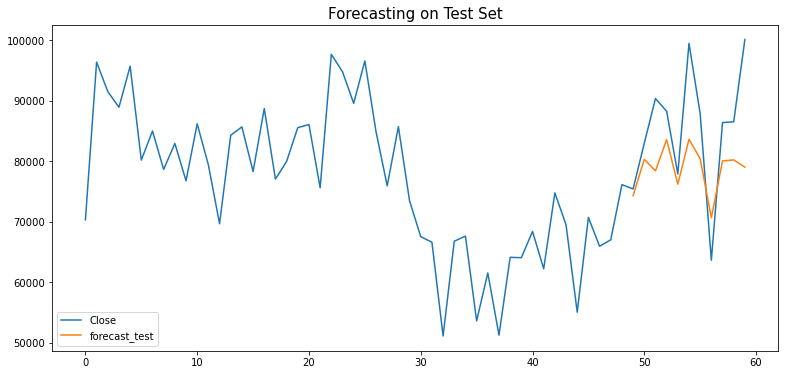

In [45]:
df[["Close", "forecast_test"]].plot(figsize=(13,6))
plt.title("Forecasting on Test Set", size=15)
plt.show()

In [46]:
print("Model Performance on Train Set")
print("-"*20)
print("Mean Absolute Error (MAE):", mean_absolute_error(df.loc[:48,"Close"], df.loc[:48,"forecast_train"]))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(df.loc[:48,"Close"], df.loc[:48,"forecast_train"]))

Model Performance on Train Set
--------------------
Mean Absolute Error (MAE): 10308.596770359927
Mean Absolute Percentage Error (MAPE): 0.14341223058489355


In [47]:
print("Model Performance on Test Set")
print("-"*30)
print("Mean Absolute Error (MAE):", mean_absolute_error(df.loc[49:,"Close"], df.loc[49:,"forecast_test"]))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(df.loc[49:,"Close"], df.loc[49:,"forecast_test"]))

Model Performance on Test Set
------------------------------
Mean Absolute Error (MAE): 7833.9501979152255
Mean Absolute Percentage Error (MAPE): 0.08773008901292863


In [48]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,forecast_train,forecast_test
0,2017-09-01,70230.0,70690.0,69990.0,70350.0,60109.231201,1.094631e+09,0.000000,NaN
1,2017-10-01,96920.0,97710.0,95430.0,96420.0,82384.250977,3.756859e+09,61638.919434,NaN
2,2017-11-01,91480.0,92450.0,90790.0,91550.0,78223.169925,2.341006e+09,91946.745866,NaN
3,2017-12-01,88520.0,89210.0,88130.0,88950.0,76001.649660,1.292206e+09,91566.863361,NaN
4,2018-01-01,96160.0,96890.0,94950.0,95740.0,81803.234620,2.519969e+09,89281.923379,NaN
5,2018-02-01,80270.0,80860.0,79650.0,80220.0,68542.464598,1.525613e+09,94923.648844,NaN
6,2018-03-01,85310.0,86130.0,84240.0,85030.0,72652.279050,2.369190e+09,82078.202403,NaN
7,2018-04-01,78400.0,79180.0,77970.0,78670.0,67218.095455,1.160043e+09,84669.626930,NaN
8,2018-05-01,82840.0,84280.0,81770.0,82970.0,71378.987062,2.510475e+09,79428.011865,NaN
9,2018-06-01,76380.0,77380.0,75960.0,76800.0,66204.514159,1.899124e+09,82526.723731,NaN


In [49]:
df = df.set_index("Date")

In [50]:
df

,Open,High,Low,Close,Adj Close,Volume,forecast_train,forecast_test
Date,,,,,,,,
2017-09-01,70230.0,70690.0,69990.0,70350.0,60109.231201,1.094631e+09,0.000000,NaN
2017-10-01,96920.0,97710.0,95430.0,96420.0,82384.250977,3.756859e+09,61638.919434,NaN
2017-11-01,91480.0,92450.0,90790.0,91550.0,78223.169925,2.341006e+09,91946.745866,NaN
2017-12-01,88520.0,89210.0,88130.0,88950.0,76001.649660,1.292206e+09,91566.863361,NaN
2018-01-01,96160.0,96890.0,94950.0,95740.0,81803.234620,2.519969e+09,89281.923379,NaN
2018-02-01,80270.0,80860.0,79650.0,80220.0,68542.464598,1.525613e+09,94923.648844,NaN
2018-03-01,85310.0,86130.0,84240.0,85030.0,72652.279050,2.369190e+09,82078.202403,NaN
2018-04-01,78400.0,79180.0,77970.0,78670.0,67218.095455,1.160043e+09,84669.626930,NaN
2018-05-01,82840.0,84280.0,81770.0,82970.0,71378.987062,2.510475e+09,79428.011865,NaN


In [51]:
#Menentukan future forecast

future_dates=[df.index[-1]+ pd.DateOffset(months=x) for x in range(1,13)]
future_df = pd.DataFrame(index=future_dates, columns=df.columns)
df_for_forecast = pd.concat([df, future_df])

df_for_forecast = df_for_forecast.reset_index()
df_for_forecast.rename(columns={"index": "Date"}, inplace=True)

In [52]:
df_for_forecast["future_forecast"] = results.predict(start=60, end=71)

In [53]:
df_for_forecast["future_forecast"].tail(15)

57             NaN
58             NaN
59             NaN
60    88621.796293
61    90000.574961
62    93525.074654
63    90930.925950
64    96399.099106
65    88584.539763
66    94141.535458
67    91673.944229
68    83638.685995
69    90735.157378
70    92712.769501
71    90690.415838
Name: future_forecast, dtype: float64

In [54]:
df_for_forecast = df_for_forecast.set_index("Date")

In [55]:
df_for_forecast["future_forecast"].tail(13)

Date
2022-08-01             NaN
2022-09-01    88621.796293
2022-10-01    90000.574961
2022-11-01    93525.074654
2022-12-01    90930.925950
2023-01-01    96399.099106
2023-02-01    88584.539763
2023-03-01    94141.535458
2023-04-01    91673.944229
2023-05-01    83638.685995
2023-06-01    90735.157378
2023-07-01    92712.769501
2023-08-01    90690.415838
Name: future_forecast, dtype: float64

Di atas merupakan data yang akan digunakan untuk forecasting

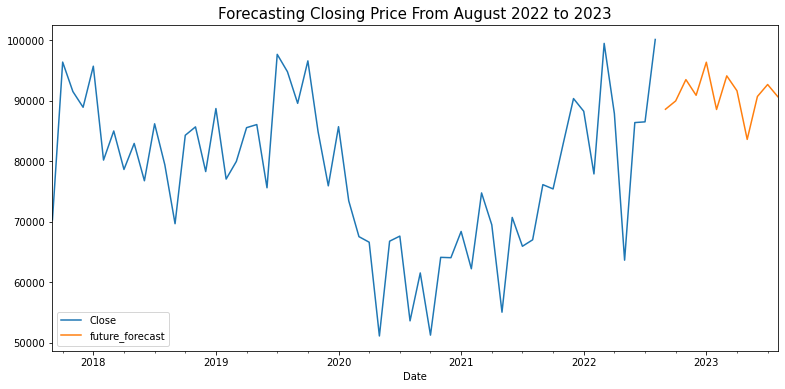

In [56]:
df_for_forecast[["Close", "future_forecast"]].plot(figsize=(13,6))
plt.title("Forecasting Closing Price From August 2022 to 2023", size=15)
plt.show()

Pada plot di atas, terlihat bahwa tren closing price untuk dari Agustus 2022-Agustus 2023 cenderung turun

# Prediksi closing price menggunakan autoARIMA

In [57]:
!pip install pmdarima

In [58]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs

d_val = ndiffs(df['Close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


In [59]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['Close'],
                      d = d_val,
                      start_p = 0,
                      max_p = 10,
                      start_q = 0,
                      max_q = 10,
                      stepwise=False,
                      max_order=12,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=1004.316, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=1011.483, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=1011.971, Time=0.03 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=1011.330, Time=0.06 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=1011.097, Time=0.06 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=1011.634, Time=0.06 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=1013.865, Time=0.10 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=1014.645, Time=0.14 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=1023.115, Time=0.08 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=1020.826, Time=0.11 sec
 ARIMA(0,1,10)(0,0,0)[1] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=1010.945, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=1008.333, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=1013.388, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=1014.384, Time=0.05 sec
 ARIMA(1,1,4)(

In [60]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [61]:
def plot_result(model, data, col_name, Ntest):
    
    params = model.get_params()
    d = params['order'][1]
    
    #in sample prediction
    train_pred = model.predict_in_sample(start=d, end=-1)
    #out of sample prediction
    test_pred, conf = model.predict(n_periods=Ntest, return_conf_int=True)
    
    #plotting real values, fitted values, and prediction values
    fig, ax= plt.subplots(figsize=(15,8))
    ax.plot(data[col_name].index, data[col_name], label='Actual Values')
    ax.plot(train.index[d:], train_pred, color='green', label='Fitted Values')
    ax.plot(test.index, test_pred, label='Forecast Values')
    ax.fill_between(test.index, conf[:,0], conf[:,1], color='red', alpha=0.3)
    ax.legend()
    
    #Evaluasi model dengan RMSE dan MAE
    y_true = test[col_name].values
    rmse = np.sqrt(mean_squared_error(y_true,test_pred))
    mae = mean_absolute_error(y_true,test_pred)

    return rmse, mae

Root Mean Squared Error:  20601.88012713643
Mean Absolute Error:  18492.12765957447


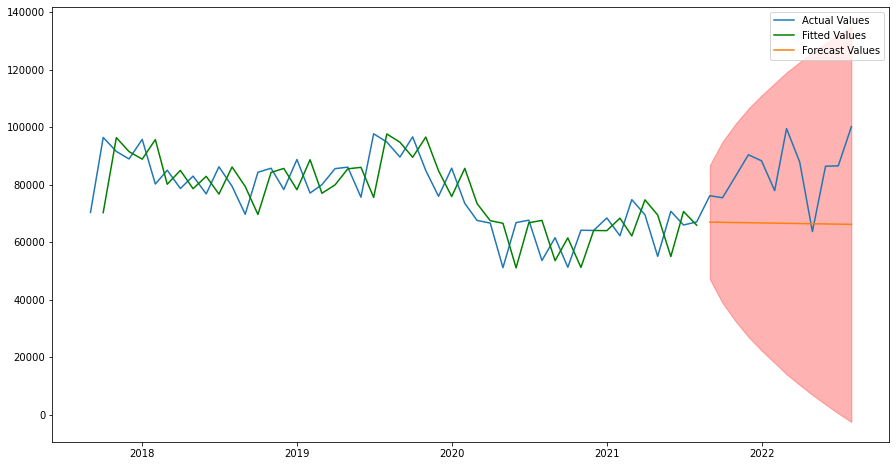

In [62]:
rmse , mae = plot_result(model, df, 'Close', Ntest=12)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

# Kesimpulan

1. Data seasonal berupa monthly data
2. Pada model SARIMA diperoleh
- Mean Absolute Error (MAE): 10308.596767870167
- Mean Absolute Percentage Error (MAPE): 0.14341 (14%)
3. Pada autoARIMA diperoleh
- Root Mean Squared Error:  20601.88012713643
- Mean Absolute Error:  18492.12765957447
4. Train dan Test pada data belum optimal dilakukan karena range dalam dataset yang digunakan kecil.
5. Performa SARIMA menunjukkan hasil yang lebih baik dibandingkan autoARIMA berdasarkan plot forecasting.
6. Berdasarkan nilai MAE dari kedua model, SARIMA merupakan model yang lebih baik dibanding autoARIMA. 

